In [43]:
import numpy as np
from datetime import datetime as dt,timedelta
import xarray as xr
from lib import driver
from lib import dataset
import netCDF4 as nc
import matplotlib.pyplot as plt
from lib.tools import *

In [2]:
expt_name = '9b2_sliding_climo_no_double_running_mean'
LIMdriver = driver.Driver(f'namelist_retrospective_8_vars_{expt_name}.py')
LIMdriver.get_variables()
LIMdriver.get_eof()

cyms file here
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_CPCtemp.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SST.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF750.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF100.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_T2m.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SLP.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_n

In [15]:
obj = LIMdriver.use_vars['SOIL']['data']
# obj = LIMdriver.use_vars['T2m']['data']
type(obj.running_mean)

numpy.ndarray

2016-12-31 00:00:00


/home/ycheng/LIM/CPC/run_code/lib/dataset.py:436: RuntimeWarning: Mean of empty slice
  zmap[ipole] = np.nanmean(zmap[tuple([ipole[0]-1,ipole[1]])])
/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


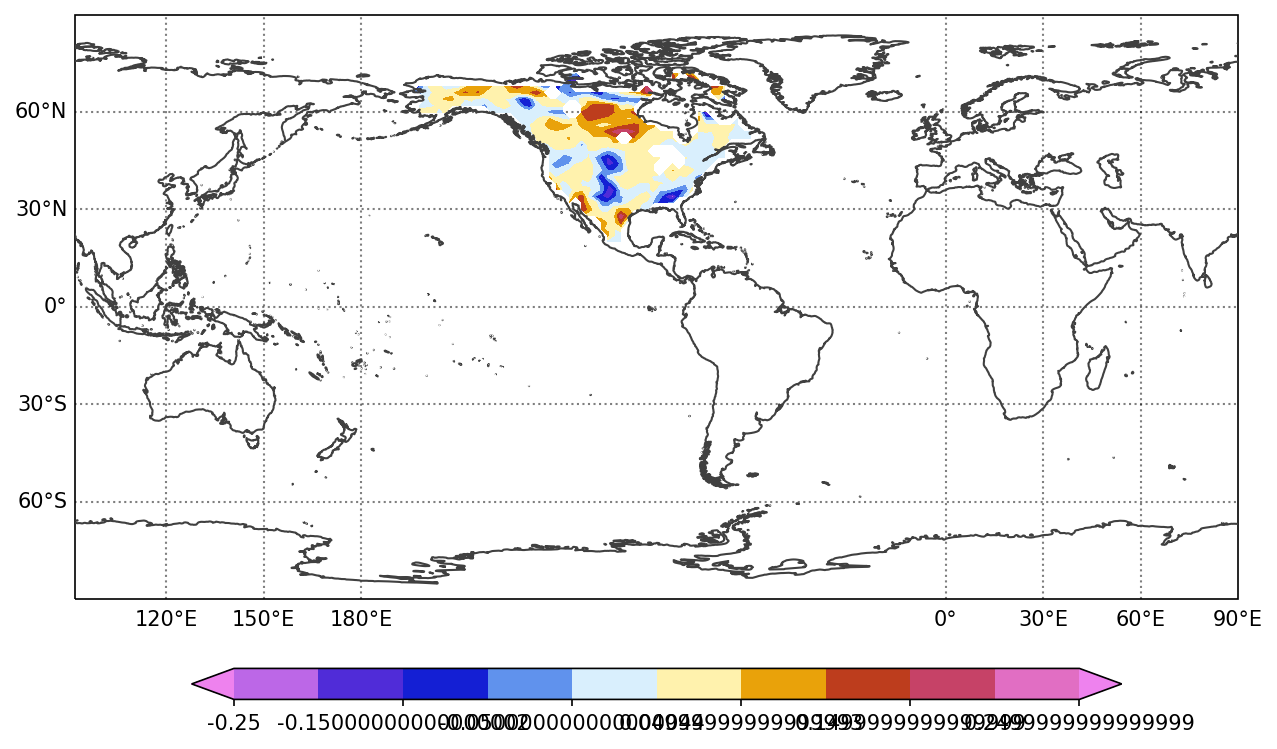

In [16]:
time = dt(2016,12,31)
# T_START = dt(2016,12,1) #dt(YEAR,MONTH,1) 
# T_END = dt(2016,12,1) #dt(YEAR,MONTH,LASTDAY)

# time = [T_START + timedelta(days=i) for i in range((T_END-T_START).days+1)]
print(time)
plot_properties={'latlon':(10,10),'levels':(-0.3,0.3),'contour_total':5,'time':time}
z = obj.running_mean[list(obj.time).index(time)]
# plot_properties={}
axes_instance = obj.plot_map(z = z,prop=plot_properties)

# Show the figure with the plot
# plt.show()
# np.nanmax(obj.running_mean)
# np.nanmin(obj.running_mean)
# np.nanmax()

In [169]:
t_init = dt(2023,8,6)
dayoffset = 3
# lead_times = listify((21,27))
lead_times = range(0,10)
days = [print(type(lt)) for lt in lead_times]
# days = [int(f'{t_init+timedelta(days = lt):%j}') for lt in lead_times]
lead_times=range(0,29+dayoffset)
print(type(lead_times))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'range'>


In [17]:
# obj.latgrid[:,0]
# obj.longrid[0,:]
obj.running_mean.shape
zmap = [obj.regrid(daily) for daily in obj.running_mean]

In [18]:
ds = xr.Dataset(
    {"soil": (("time", "lat", "lon"), zmap)},
    coords={"time": obj.time, "lat": obj.latgrid[:,0],"lon": obj.longrid[0,:]},
    attrs={"description": "soil"},
)

In [19]:
from cartopy import crs as ccrs

def plot_map(time_index, contour_levels, lat_bounds, lon_bounds):
    fig, ax = plt.subplots()
    ds.soil.sel(time=time).plot.contourf(ax=ax, levels=contour_levels, projection=ccrs.PlateCarree())
    ax.set_xlim([lon_bounds[0], lon_bounds[1]])
    ax.set_ylim([lat_bounds[0], lat_bounds[1]])
    # return plot


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas/_libs/index.pyx", line 548, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 2263, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 2273, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1483228800000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 516, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas/_libs/index.pyx", line 550, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2017-01-01 00:00:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/ycheng/.conda/envs/

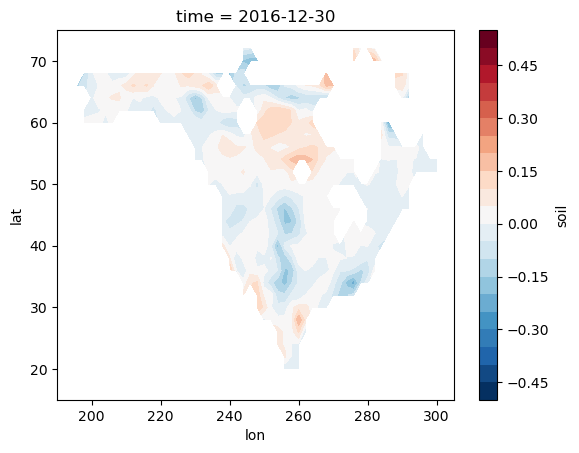

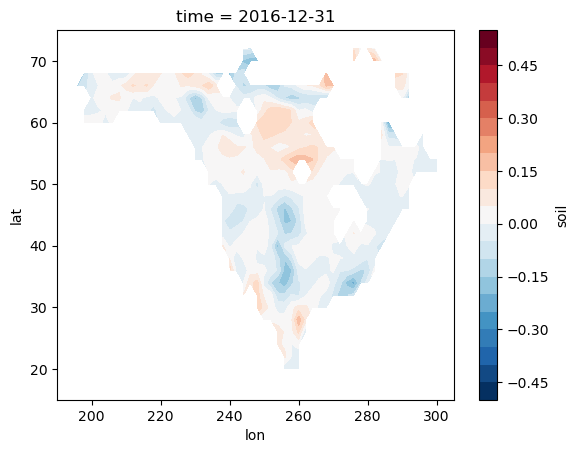

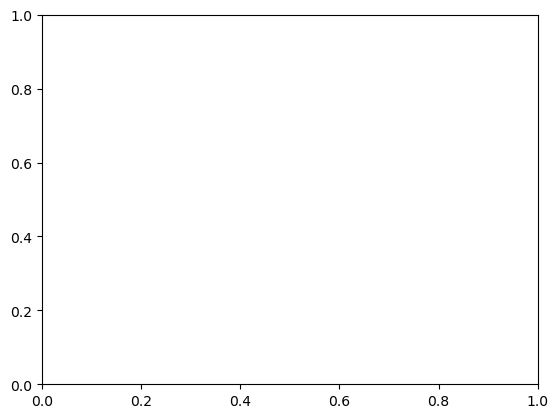

In [21]:
T_START = dt(2016,12,30) #dt(YEAR,MONTH,1) 
T_END = dt(2017,1,1) #dt(YEAR,MONTH,LASTDAY)
# T_START = dt(2017,12,15) #dt(YEAR,MONTH,1) 
# T_END = dt(2018,1,1) #dt(YEAR,MONTH,LASTDAY)
times = [T_START + timedelta(days=i) for i in range((T_END-T_START).days+1)]

contour_levels = np.arange(-0.5,0.6,0.05)  # Replace with your desired contour levels
lat_bounds = [15, 75]  # Replace with your desired latitude boundaries
lon_bounds = [190, 305]   # Replace with your desired longitude boundaries

# Plot the data
for time in times:
    plot_map(time, contour_levels, lat_bounds, lon_bounds)
# def animate(frame):
#     plt.clf()  # Clear the current plot
#     return plot_map(frame, contour_levels, lat_bounds, lon_bounds)

# animation = FuncAnimation(fig, animate, frames=total_frames, repeat=False)
plt.close()

In [41]:
data = np.array([[1, 2, 3, 4, 5],[1, 2, 3, 4, 5]])
mask = np.array([[False, False, True, False, False],[False, False, True, False, False]])
masked_data = np.ma.masked_array(data, mask)

print(masked_data.shape)
print(np.arange(2).shape)
da = xr.DataArray(masked_data,coords={'time': [1,2], 'space': [1,2,3,4,5]},dims=['time','space'])

ds = xr.Dataset()
ds['mask'] = da

(2, 5)
(2,)


In [42]:
print(ds)
ds.to_netcdf(ds)

<xarray.Dataset>
Dimensions:  (time: 2, space: 5)
Coordinates:
  * time     (time) int64 1 2
  * space    (space) int64 1 2 3 4 5
Data variables:
    mask     (time, space) float64 1.0 2.0 nan 4.0 5.0 1.0 2.0 nan 4.0 5.0


TypeError: expected str, bytes or os.PathLike object, not Dataset

In [196]:
# varname = 'SF750'
# varname = 'SF100'
varname = 'H500'
dsclimo = xr.open_dataset(f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/2023/{varname}/{varname}.2023.nc')          
climo_RT = np.array(dsclimo['climo'][:])
climo_RT = np.array([LIMdriver.use_vars[varname]['data'].flatten(i) for i in climo_RT])
climo_RT
# climo_RT[abs(climo_RT)>1e29]=np.nan
# climo_RT.shape
# anom = dsclimo['anomaly'][0].plot()

array([[5096.317 , 5096.317 , 5096.317 , ..., 5823.867 , 5824.506 ,
        5825.12  ],
       [5095.8623, 5095.8623, 5095.8623, ..., 5823.656 , 5824.2935,
        5824.906 ],
       [5095.397 , 5095.397 , 5095.397 , ..., 5823.455 , 5824.092 ,
        5824.702 ],
       ...,
       [5097.623 , 5097.623 , 5097.623 , ..., 5824.5664, 5825.208 ,
        5825.83  ],
       [5097.197 , 5097.197 , 5097.197 , ..., 5824.3223, 5824.9624,
        5825.582 ],
       [5096.7617, 5096.7617, 5096.7617, ..., 5824.089 , 5824.7285,
        5825.3457]], dtype=float32)

In [197]:
ds = xr.open_dataset(f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/offline_climatology/2p0.1981-2010/data_clim/2p0.1981-2010_{varname}.nc')
climo_new = np.array(ds[varname][:])
# ds[varname].isel(pts=600).plot()
climo_new

# ds = xr.open_dataset('/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9b2_sliding_climo_no_double_running_mean/2017/T2m/T2m.2016.nc')          
# ds = xr.open_dataset('data_clim/T2m/T2m.2019.nc')
# climo_new = np.array(ds['climo'][:])
# climo_new = np.array([LIMdriver.use_vars['T2m']['data'].flatten(i) for i in climo_new])

# print(climo_new)
diff = climo_RT-climo_new

In [198]:
diff

array([[20.84461383, 20.84461383, 20.84461383, ...,  3.65820716,
         3.73029685,  3.86275137],
       [21.12033822, 21.12033822, 21.12033822, ...,  3.6926939 ,
         3.76237123,  3.89660319],
       [21.4005366 , 21.4005366 , 21.4005366 , ...,  3.72773334,
         3.79483462,  3.93067193],
       ...,
       [20.05260165, 20.05260165, 20.05260165, ...,  3.55506146,
         3.63345459,  3.7616509 ],
       [20.31021866, 20.31021866, 20.31021866, ...,  3.58949612,
         3.66545059,  3.79536021],
       [20.57454284, 20.57454284, 20.57454284, ...,  3.62343614,
         3.69777936,  3.82927625]])

In [118]:
objT2m = LIMdriver.use_vars['T2m']['data']

tmap = np.array([objT2m.regrid(daily) for daily in diff])

In [119]:
tmap = np.square(tmap**2)

In [120]:
dsT2m = xr.Dataset(
    {"tmap": (("doy", "lat", "lon"), tmap)},
    coords={"time": np.arange(365), "lat": objT2m.latgrid[:,0],"lon": objT2m.longrid[0,:]},
    attrs={"description": "climo"},
)

In [122]:
dsT2m['tmap'].mean(axis=0)

<xarray.DataArray 'tmap' (lat: 91, lon: 180)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2130: UserWarning: The following kwargs were not used by contour: 'projection'
  primitive = ax.contourf(x, y, z, **kwargs)


(15.0, 75.0)

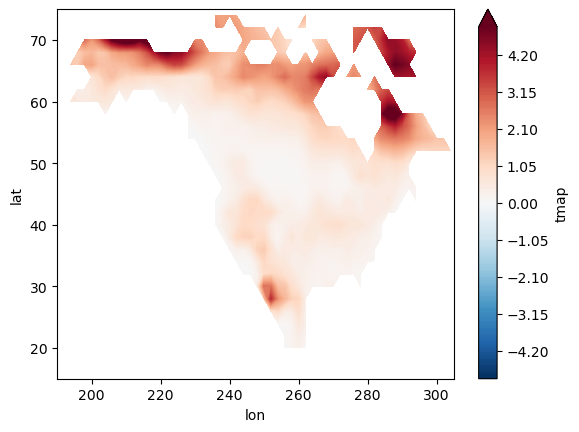

In [127]:
fig, ax = plt.subplots()
contour_levels = np.arange(-5,5.05,0.05)
dsT2m['tmap'].mean(axis=0).plot.contourf(ax=ax, levels=contour_levels, projection=ccrs.PlateCarree())
ax.set_xlim([lon_bounds[0], lon_bounds[1]])
ax.set_ylim([lat_bounds[0], lat_bounds[1]])

In [180]:
dsnc = nc.Dataset('/data/ycheng/JRA/Data/2006/sf_2006_1p25.nc')

In [181]:
dsnc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): isobaricInhPa(37), latitude(145), longitude(288), time(365)
    variables(dimensions): int64 number(), float64 step(), float64 isobaricInhPa(isobaricInhPa), float64 latitude(latitude), float64 longitude(longitude), float32 strf(time, isobaricInhPa, latitude, longitude), int64 time(time)
    groups: 

In [182]:
lev_name = ([s for s in dsnc.variables.keys() if 'lev' in s or 'lv_' in s]+[None])[0]

In [183]:
lev_name

In [184]:
print(lev_name)

None
